# Speech Enhancement Based on SpeechBrain

## 1. Objectives
This lab exercise enables you to learn how to use the pre-trained speech models from SpeechBrain to reduce the noise in speech files.

## 2. Prerequisites
Before starting this lab, you should learn the <a href="https://speechbrain.readthedocs.io/en/v1.0.3/tutorials/basics.html">basics</a> of SpeechBrain and read the <a href="https://speechbrain.readthedocs.io/en/v1.0.3/tutorials/tasks/speech-enhancement-from-scratch.html">tutorial</a> on speech enhancement. After knowing what SpeechBrain is about and how it performs speech enhancement, you need to read the procedure for using its <a href="https://speechbrain.readthedocs.io/en/v1.0.3/API/speechbrain.inference.enhancement.html">pre-trained models</a> for speech enhancement.

##3. Submission
Write a report, convert it to PDF, and submit it to Blackboard before the deadline specified in Blackboard. Your report may contain the following:
<ol type="a">
  <li>Discussions on your observations, e.g., what kind of noise is difficult for the pre-trained model</li>
  <li>Waveforms and spectrograms of noisy speech corrupted by different noise types</li>
  <li>Waveforms and spectrograms of denoised speech enhanced by different pre-trained models</li>
  <li>Comparison between spectral subtraction and deep learning based speech enhancement

</ol>

##4. Prepare Colab Environment
Colab runs on browsers. You need a Google account to use Colab. If you do not have one, visit https://support.google.com/mail/answer/56256?hl=en.

Display the Google Drive page (https://drive.google.com/drive/my-drive) in your browser. Use the “+ New” button on the left panel to create a directory structure in your Google Drive as follows: "My Drive/Learning/EIE558/Lab1"

##5. Procedure
1. Upload this .ipynb file to your Google Drive under the "My Drive/Learning/EIE558/Lab1" folder.
2. Create a folder "My Drive/Learning/EIE558/Lab1/audio".
3. Download the .wav files in https://github.com/enmwmak/Teaching/tree/main/EIE558/lab/2025 and upload them to your "My Drive/Learning/EIE558/Lab1/audio" folder in Google Drive.
3. Execute the following cells.

In [23]:
# Check Python version (This script works on Python 3.12, Torch 2.8, and Torchaudio 2.8)
!python --version
import torch
import torchaudio
print(torch.__version__)
print(torchaudio.__version__)

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Python 3.12.11


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-726189568.py", line 3, in <cell line: 0>
    import torch
  File "<frozen importlib._bootstrap>", line 1360, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1322, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 1262, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1532, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1504, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1483, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    s

In [ ]:
# Mount Google Drive and change to the Lab1 folder.
# You should perform this step after the expiration of each session.
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd /content/drive/MyDrive/Learning/EIE558/Lab1

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Mounted at /content/drive/
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-2726039534.py", line 5, in <cell line: 0>
    get_ipython().run_line_magic('cd', '/content/drive/MyDrive/Learning/EIE558/Lab1')
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
                              ^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
             ^^^^^^^^^^^
OSError: [Errno 107] Transport endpoint is not connected

During handling of the ab

In [3]:
# Installing SpeechBrain via pip.
# You should perform this step after the expiration of each Colab session.
BRANCH = 'develop'
!python -m pip install git+https://github.com/speechbrain/speechbrain.git@$BRANCH

  Cloning https://github.com/speechbrain/speechbrain.git (to revision develop) to /tmp/pip-req-build-hlcv5zal
  Running command git clone --filter=blob:none --quiet https://github.com/speechbrain/speechbrain.git /tmp/pip-req-build-hlcv5zal
  Resolved https://github.com/speechbrain/speechbrain.git to commit 7d214a38861b7e8ba6a504f126c879275ac9515b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
# Clone SpeechBrain repository to your Lab1 folder.
# Skip this step if you have done this before as SpeechBrain has been installed on your Lab1 folder
%cd /content/drive/MyDrive/Learning/EIE558/Lab1
!git clone https://github.com/speechbrain/speechbrain/

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-3856619033.py", line 3, in <cell line: 0>
    get_ipython().run_line_magic('cd', '/content/drive/MyDrive/Learning/EIE558/Lab1')
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
                              ^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
             ^^^^^^^^^^^
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exce

In [4]:
# Define a function that plots the waveforms and spectrograms of noisy and enhanced speech
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display

def show_wav_and_spec(wavfile):
  waveform, srate = librosa.load(wavfile, sr=librosa.get_samplerate(wavfile))
  n_samples = len(waveform)
  frm_size = int(0.032 * srate)       # 32ms per frame
  frm_shift = int(0.01 * srate)       # 100Hz frame rate
  n_fft = n_samples if (n_samples < frm_size) else frm_size

  # Compute magnitude spectrogram
  magspec = abs(librosa.stft(y=waveform, n_fft=frm_size, hop_length=frm_shift))

  # Plot spectrogram and waveform
  plt.figure(figsize=(10, 4))
  plt.subplot(211)
  librosa.display.specshow(librosa.amplitude_to_db(magspec), sr=srate, y_axis='linear',
                           hop_length=frm_shift)
  plt.subplot(313)
  librosa.display.waveshow(waveform, sr=srate, offset=0)
  plt.margins(x=0)
  plt.show()

  display(Audio(wavfile, autoplay=True))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-254059296.py", line 2, in <cell line: 0>
    import librosa
  File "<frozen importlib._bootstrap>", line 1360, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1322, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 1262, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1532, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1504, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1483, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
   

In [5]:
# Download and use a spectral-masking based pre-trained model to enhance speech
%cd /content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement
import torch
from speechbrain.inference.enhancement import SpectralMaskEnhancement

# Model is downloaded from the speechbrain HuggingFace repo
enhancer = SpectralMaskEnhancement.from_hparams(source="speechbrain/metricgan-plus-voicebank",
                                                savedir="tmpdir1",)
enhanced = enhancer.enhance_file("../../../audio/noisyspeech16k.wav", output_filename="../../../audio/enhanced1.wav")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-777534923.py", line 2, in <cell line: 0>
    get_ipython().run_line_magic('cd', '/content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement')
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
                              ^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
             ^^^^^^^^^^^
OSError: [Errno 107] Transport endpoint is not connected

During handling of 

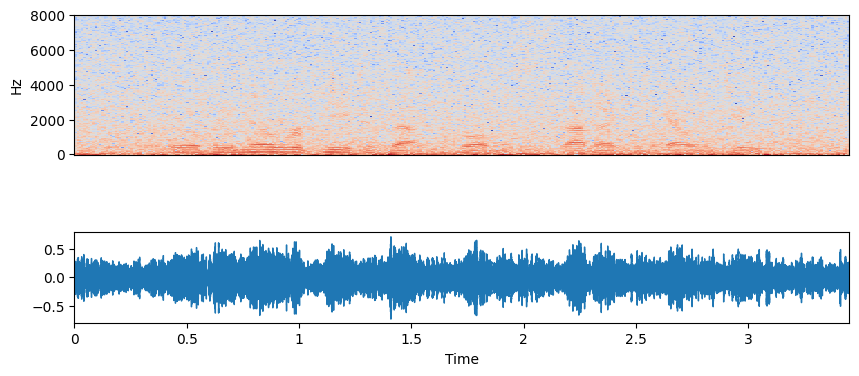

In [6]:
# Display the spectrogram and waveform of the noisy speech file and play the audio file
show_wav_and_spec("../../../audio/noisyspeech16k.wav")

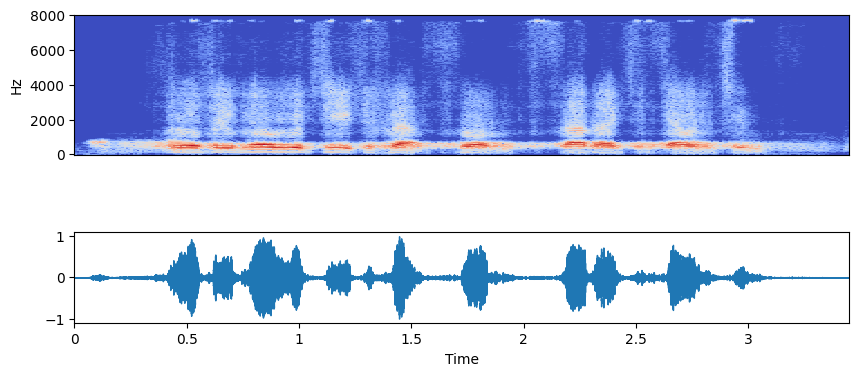

In [7]:
# Display the spectrogram and waveform of the enhanced speech file and play the audio file
show_wav_and_spec("../../../audio/enhanced1.wav")

In [22]:
# Download and use another spectral-based pre-trained SE model to enhance speech
%cd /content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement

from speechbrain.inference.enhancement import WaveformEnhancement
# Model is downloaded from the speechbrain HuggingFace repo
enhancer = WaveformEnhancement.from_hparams(source="speechbrain/mtl-mimic-voicebank",
                                            savedir="tmpdir2",)
enhanced = enhancer.enhance_file("../../../audio/noisyspeech16k.wav", output_filename="../../../audio/enhanced2.wav")

INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Using symlink found at '/content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement/tmpdir2/hyperparams.yaml'


/content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement


DEBUG:speechbrain.utils.parameter_transfer:Collecting files (or symlinks) for pretraining in tmpdir2.
INFO:speechbrain.utils.fetching:Fetch enhance_model.ckpt: Using symlink found at '/content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement/tmpdir2/enhance_model.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["enhance_model"] = /content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement/tmpdir2/enhance_model.ckpt
INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: enhance_model
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): enhance_model -> /content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement/tmpdir2/enhance_model.ckpt
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``nor

KeyboardInterrupt: 

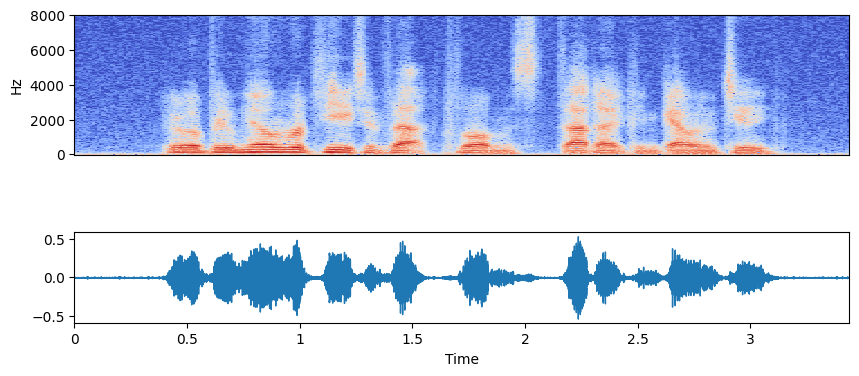

In [9]:
SE# Display the spectrogram and waveform of the enhanced speech file and play the audio file
show_wav_and_spec("../../../audio/enhanced2.wav")

In [11]:
# Adding different types of noise to clean speech and save the noisy speech
# as "Lab1/audio/speech+noise.wav"
%cd /content/drive/MyDrive/Learning/EIE558/Lab1/audio
import torch
import torchaudio
import torchaudio.functional as F
snr_db = 0.0  # SNR in dB
speech, _ = torchaudio.load("./cleanspeech16k.wav")
noise, _ = torchaudio.load("./machinegun.wav")
noise = noise[:, : speech.shape[1]]
noisy_speech = F.add_noise(speech, noise, snr=torch.tensor([snr_db]))
torchaudio.save("./speech+noise.wav", noisy_speech, sample_rate=16000, format="wav")

/content/drive/MyDrive/Learning/EIE558/Lab1/audio


/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be r

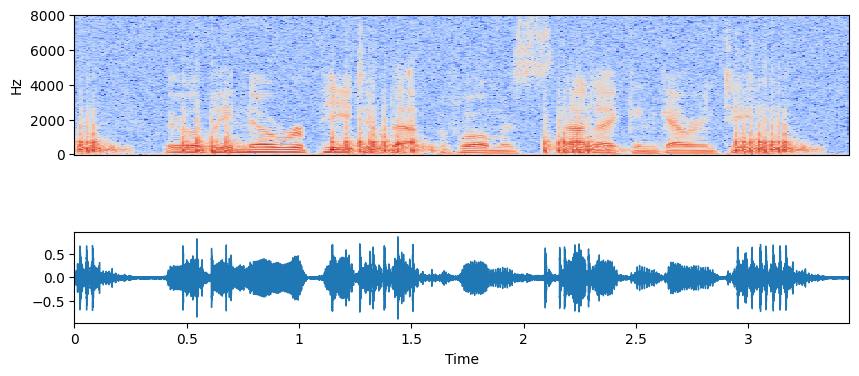

In [12]:
# Play the created noisy speech file
# Display the spectrogram and waveform of the noisy speech file and play the audio file
show_wav_and_spec("./speech+noise.wav")

In [13]:
# Download and use an end-to-end pre-trained model to enhance speech
%cd /content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement

from speechbrain.inference.enhancement import WaveformEnhancement
# Model is downloaded from the speechbrain HuggingFace repo
enhancer = WaveformEnhancement.from_hparams(source="speechbrain/mtl-mimic-voicebank",
                                            savedir="tmpdir2",)
enhanced = enhancer.enhance_file("../../../audio/speech+noise.wav", output_filename="../../../audio/enhanced2.wav")

INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Using symlink found at '/content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement/tmpdir2/hyperparams.yaml'


/content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement


DEBUG:speechbrain.utils.parameter_transfer:Collecting files (or symlinks) for pretraining in tmpdir2.
INFO:speechbrain.utils.fetching:Fetch enhance_model.ckpt: Using symlink found at '/content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement/tmpdir2/enhance_model.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["enhance_model"] = /content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement/tmpdir2/enhance_model.ckpt
INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: enhance_model
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): enhance_model -> /content/drive/MyDrive/Learning/EIE558/Lab1/speechbrain/templates/enhancement/tmpdir2/enhance_model.ckpt


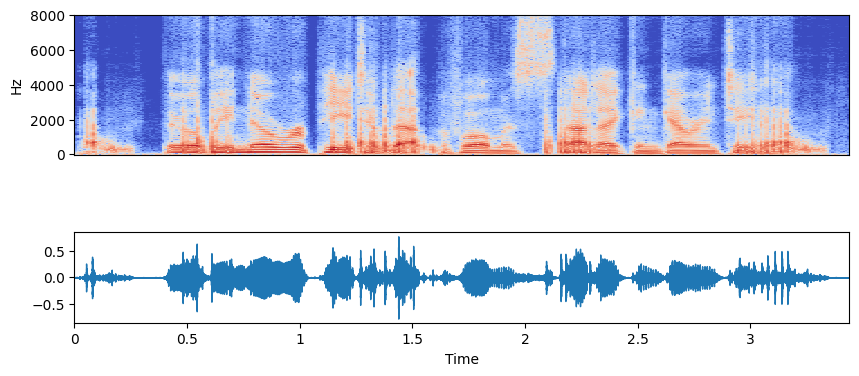

In [85]:
# Display the spectrogram and waveform of the enhanced speech file and play the audio file
show_wav_and_spec("../../../audio/enhanced2.wav")

### Code for Spectral Subtraction

In [14]:
def specsub(y, frame_size, frame_shift, sr=16000):
    Y = librosa.stft(y, n_fft=frame_size, hop_length=frame_shift)     # Short-time Fourier transform
    Ymag= np.abs(Y)         # Get magnitude (spectrogram)
    Ypha= np.angle(Y)       # Get phase

    # Assume that the beginning of the speech file contains noise only and get its average noise spectrum
    noise_dur = 0.5             # Duration at the beginning of the file considered as noise
    alpha = 2                   # Over-subtraction factor
    noise_mag = Ymag[:, 0:int(noise_dur*sr/frame_shift)]
    mean_noise_mag = np.mean(noise_mag, axis=1)
    Xmag = Ymag - alpha * mean_noise_mag.reshape((mean_noise_mag.shape[0],1))

    # Implement |Y(w) - B(w)| so that all negative values are set to 0
    mask = (Xmag > 0).astype(int)
    Xmag = Xmag * mask

    # Convert to complex number using the phase information of noisy speech. Then, convert to time domain using ISTFT
    Y = Xmag * np.exp(1.0j* Ypha)
    y = librosa.istft(Y, n_fft=frame_size, hop_length=frame_shift)
    return y, Y, mask

In [15]:
# Load the noisy speech and perform spectral subtraction
%cd /content/drive/MyDrive/Learning/EIE558/Lab1
frame_size = 512
frame_shift = 64
y, sr = librosa.load("audio/noisyspeech16k.wav", sr=None, mono=True) # keep native sr (sampling rate) and trans into mono
x, X, mask = specsub(y, frame_size=frame_size, frame_shift=frame_shift, sr=sr)
print(X.shape)

/content/drive/MyDrive/Learning/EIE558/Lab1
(257, 863)


In [19]:
# Function for plotting speech signal and its spectrogram
def plot_speech(x, sr=8000, frm_len=512, hop_len=256):
    X = librosa.amplitude_to_db(np.abs(librosa.stft(x, n_fft=frm_len, hop_length=hop_len)), ref=np.max)  # STFT of x
    _, ax = plt.subplots(nrows=2, sharex=True, figsize=(8,4))
    librosa.display.waveshow(x, sr=sr, ax=ax[0])
    librosa.display.specshow(X, sr=sr, n_fft=frm_len, hop_length=hop_len, x_axis='time', y_axis='linear', ax=ax[1])
    display(Audio(x, rate=sr, autoplay=True))

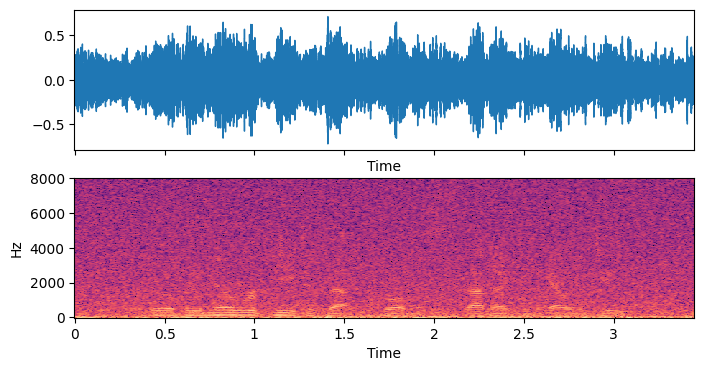

In [20]:
# Plot noisy speech
plot_speech(y, sr=16000, frm_len=frame_size, hop_len=frame_shift)

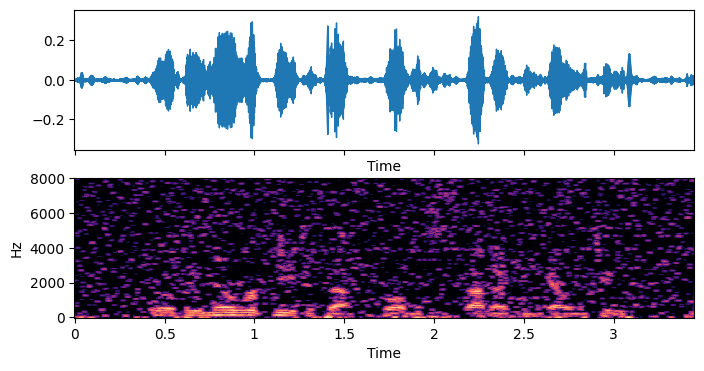

In [21]:
# Plot denoised speech
plot_speech(x, sr=16000, frm_len=frame_size, hop_len=frame_shift)

## References
1. Fu, Szu-Wei, et al. "Metricgan: Generative adversarial networks based black-box metric scores optimization for speech enhancement." International Conference on Machine Learning. PmLR, 2019.
2. Fu, Szu-Wei, et al. "Metricgan+: An improved version of metricgan for speech enhancement." arXiv preprint arXiv:2104.03538 (2021).
3. Bagchi, Deblin, et al. "Spectral feature mapping with mimic loss for robust speech recognition." 2018 IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP). IEEE, 2018.